# 01_BaseModel1

Written by: Rupesh Kumar Dey

Implemented in: Paperspace Gradient


Notebook used for model development and testing for Base Model 1

## Importing required Libraries

In [1]:
# !pip uninstall opencv-python
!pip install tensorflow_hub
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 KB 18.0 MB/s eta 0:00:00
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 KB 23.5 MB/s eta 0:00:00
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [2]:
# Importing python Libraries
# General / plotting libraries
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Image Libraries
from PIL import Image

# File System Libraries
import os
import sys
import copy
from copy import deepcopy

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, metrics, callbacks
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from HelperFunctions import *

In [3]:
# Setting project parent directory path 
projectPath = "/notebooks"

## Model Development - Base Model 01

Base Models are the original models with default settings of 50 Epochs and with SGD Optimizer

The models are tested across 4 different types of images
1. Normal Image without any image Processing
2. CLAHE image 
3. Multiscale image
4. Rayleigh image

### 01_BaseModel1_NORMAL: Base Model 1 without Image Processing

#### Dataset Loading 

In [7]:
# Defining path of dataset
train_path = "/Dataset/Dataset_NORMAL/train"
test_path = "/Dataset/Dataset_NORMAL/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (100,100))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [8]:
# Create & Train Model using helper function
BaseModel1_NORMAL = createBaseModel()
# Print model summary
BaseModel1_NORMAL.summary()
# Set path to save checkpoint
checkpointPath = "TrainedResults/01_BaseModel1_NORMAL/checkpoint/01_BaseModel1_NORMAL.ckpt"
# Train model
BaseModel1_NORMAL_history = trainModel(BaseModel1_NORMAL, train_data, valid_data, checkpointPath ,epochs = 50)

2022-08-25 15:03:21.401886: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 15:03:21.454808: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 15:03:21.455149: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 15:03:21.457561: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-25 15:03:21.457981: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 8)       224       
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 8)      32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 100, 100, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 99, 99, 16)        1168  

2022-08-25 15:03:25.159492: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


131/131 [==============================] - ETA: 0s - loss: 4.7055 - accuracy: 0.8448 - recall: 0.8438
Epoch 00001: val_accuracy improved from -inf to 0.77778, saving model to TrainedResults/01_BaseModel1_NORMAL/checkpoint/01_BaseModel1_NORMAL.ckpt
131/131 [==============================] - 53s 386ms/step - loss: 4.7055 - accuracy: 0.8448 - recall: 0.8438 - val_loss: 0.7622 - val_accuracy: 0.7778 - val_recall: 0.7760
Epoch 2/50
131/131 [==============================] - ETA: 0s - loss: 0.2324 - accuracy: 0.9424 - recall: 0.9424
Epoch 00002: val_accuracy improved from 0.77778 to 0.84896, saving model to TrainedResults/01_BaseModel1_NORMAL/checkpoint/01_BaseModel1_NORMAL.ckpt
131/131 [==============================] - 39s 301ms/step - loss: 0.2324 - accuracy: 0.9424 - recall: 0.9424 - val_loss: 0.3911 - val_accuracy: 0.8490 - val_recall: 0.8455
Epoch 3/50
131/131 [==============================] - ETA: 0s - loss: 0.1197 - accuracy: 0.9643 - recall: 0.9643
Epoch 00003: val_accuracy improve

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 6s 9ms/step
Confusion Matrix:


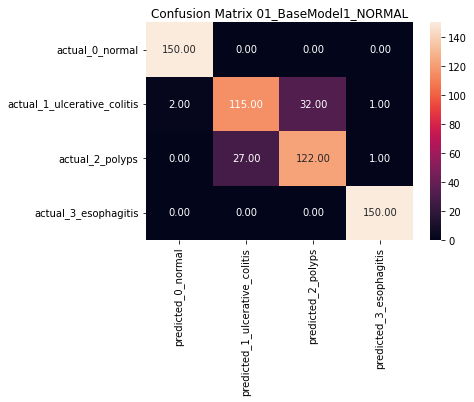

In [9]:
# Load best model from checkpoint folder
BaseModel1_NORMAL = createBaseModel()
checkpointPath = "TrainedResults/01_BaseModel1_NORMAL/checkpoint/01_BaseModel1_NORMAL.ckpt"
loadModel(BaseModel1_NORMAL,checkpointPath)
# Generate results for validation and save 
df_results, confusion_matrix, y_true, predictions = testResults(BaseModel1_NORMAL, test_data, "01_BaseModel1_NORMAL" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResults/01_BaseModel1_NORMAL/results/confusionMatrix/01_BaseModel1_NORMAL.jpg")

2022-08-25 15:46:00.396976: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://5cbff3eb-5cd9-4f24-9cd4-248942e342f8/assets


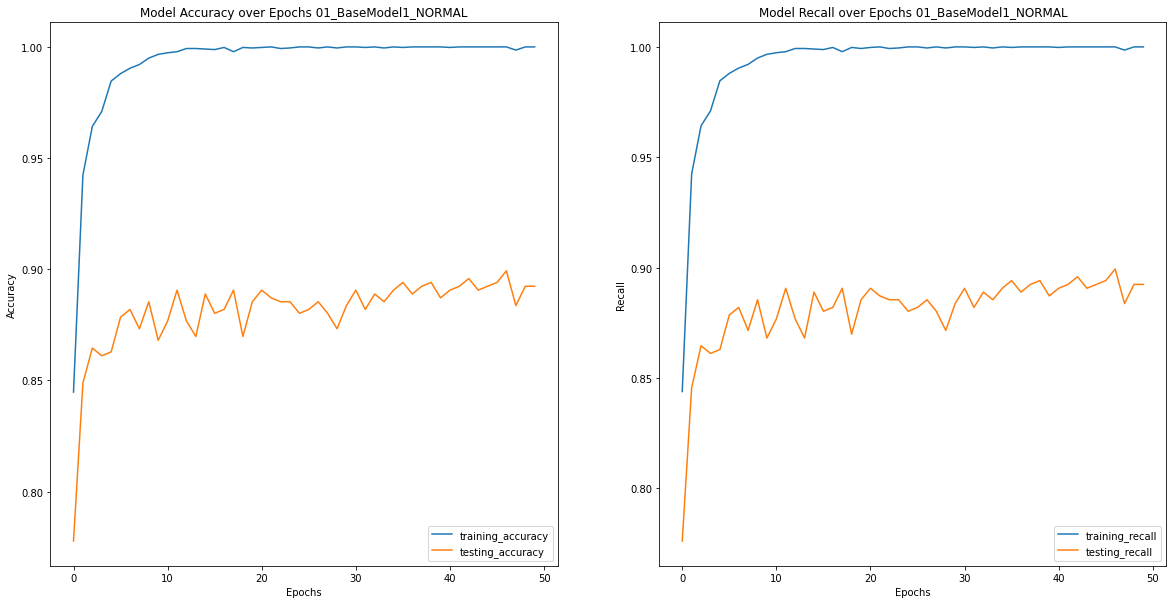

In [10]:
# Save results csv
saveResults_csv(df_results,"TrainedResults/01_BaseModel1_NORMAL/results/classificationReport/01_BaseModel1_NORMAL.csv")
# Save model training history
historyPath = "TrainedResults/01_BaseModel1_NORMAL/history/01_BaseModel1_NORMAL.npy"
save_history1(BaseModel1_NORMAL_history, historyPath)
# Load and plot model training history
history = load_history(historyPath)
plot_history(history, "01_BaseModel1_NORMAL", location = "TrainedResults/01_BaseModel1_NORMAL/history/01_BaseModel1_NORMAL.jpg")

### 01_BaseModel1_CLAHE: Base Model 1 with Image Processing CLAHE

#### Dataset Loading 

In [13]:
# Defining path of dataset
train_path = "/Dataset/Dataset_CLAHE/train"
test_path = "/Dataset/Dataset_CLAHE/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (100,100))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [14]:
# Create and Train Model
BaseModel1_CLAHE = createBaseModel()
# Print model summary
BaseModel1_CLAHE.summary()
# Train model
checkpointPath = "TrainedResults/01_BaseModel1_CLAHE/checkpoint/01_BaseModel1_CLAHE.ckpt"
BaseModel1_CLAHE_history = trainModel(BaseModel1_CLAHE, train_data, valid_data, checkpointPath ,epochs = 50)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 100, 100, 8)       224       
                                                                 
 batch_normalization_9 (Batc  (None, 100, 100, 8)      32        
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 100, 100, 8)       0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 99, 99, 8)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 99, 99, 16)        1168

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 4s 6ms/step
Confusion Matrix:


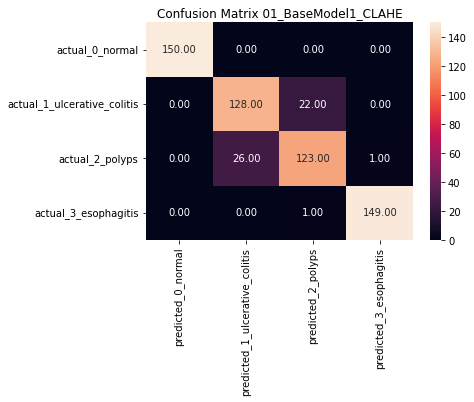

In [15]:
# Load best model from checkpoint folder
BaseModel1_CLAHE = createBaseModel()
checkpointPath = "TrainedResults/01_BaseModel1_CLAHE/checkpoint/01_BaseModel1_CLAHE.ckpt"
loadModel(BaseModel1_CLAHE,checkpointPath)
# Generate results for validation and save 
df_results, confusion_matrix, y_true, predictions = testResults(BaseModel1_CLAHE, test_data, "01_BaseModel1_CLAHE" ,
                                                                data_class = ["0_normal_CLAHE",
                                                                              "1_ulcerative_colitis_CLAHE",
                                                                              "2_polyps_CLAHE",
                                                                              "3_esophagitis_CLAHE"],
                                                                location = "TrainedResults/01_BaseModel1_CLAHE/results/confusionMatrix/01_BaseModel1_CLAHE.jpg")

INFO:tensorflow:Assets written to: ram://9b499c3c-b105-49c2-b774-4eae99dd14da/assets


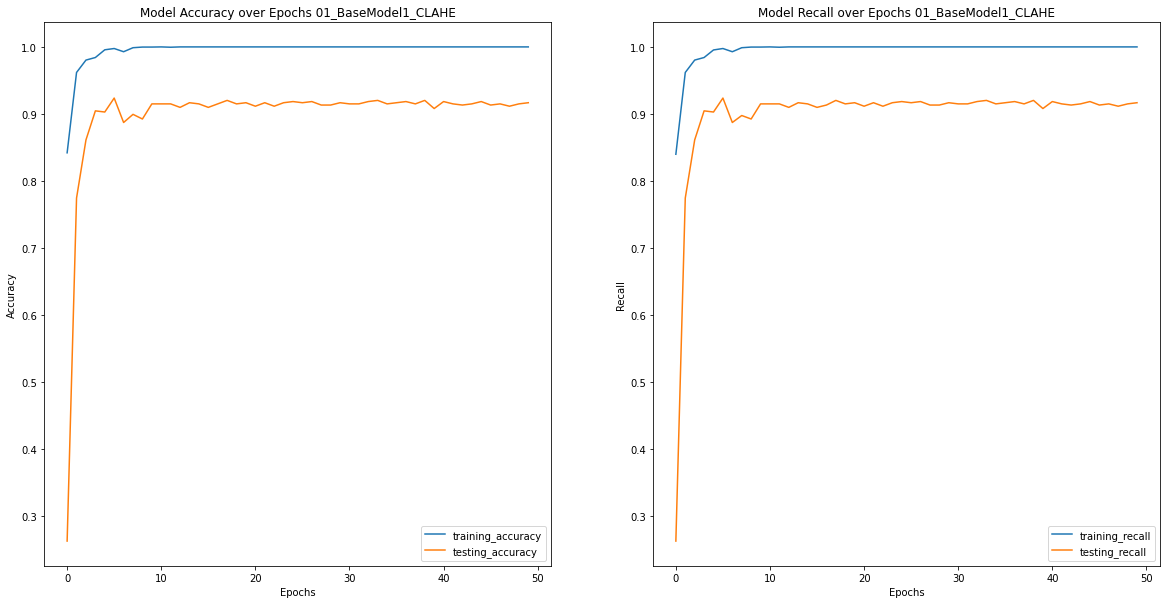

In [16]:
# Save results csv
saveResults_csv(df_results,"TrainedResults/01_BaseModel1_CLAHE/results/classificationReport/01_BaseModel1_CLAHE.csv")
# Save model training history
historyPath = "TrainedResults/01_BaseModel1_CLAHE/history/01_BaseModel1_CLAHE.npy"
save_history1(BaseModel1_CLAHE_history, historyPath)
# Load and plot model training history
history = load_history(historyPath)
plot_history(history, "01_BaseModel1_CLAHE", location = "TrainedResults/01_BaseModel1_CLAHE/history/01_BaseModel1_CLAHE.jpg")

### 01_BaseModel1_MULTISCALE: Base Model 1 with Image Processing MULTISCALE

#### Dataset Loading 

In [17]:
# Defining path of dataset
train_path = "/Dataset/Dataset_MULTISCALE/train"
test_path = "/Dataset/Dataset_MULTISCALE/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (100,100))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [18]:
# Create and Train Model
BaseModel1_MULTISCALE = createBaseModel()
# Model summary
BaseModel1_MULTISCALE.summary()
# Train model
checkpointPath = "TrainedResults/01_BaseModel1_MULTISCALE/checkpoint/01_BaseModel1_MULTISCALE.ckpt"
BaseModel1_MULTISCALE_history = trainModel(BaseModel1_MULTISCALE, train_data, valid_data, checkpointPath ,epochs = 50)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_15 (Conv2D)          (None, 100, 100, 8)       224       
                                                                 
 batch_normalization_15 (Bat  (None, 100, 100, 8)      32        
 chNormalization)                                                
                                                                 
 activation_15 (Activation)  (None, 100, 100, 8)       0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 99, 99, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 99, 99, 16)        1168

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 4s 6ms/step
Confusion Matrix:


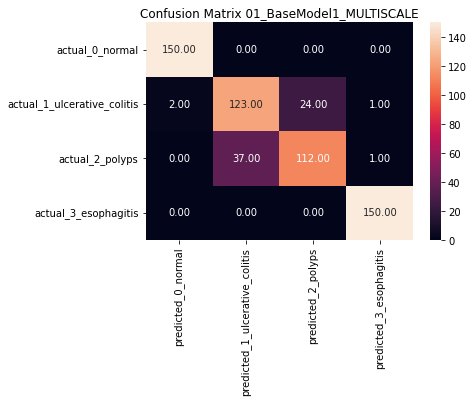

In [19]:
# Load best model from checkpoint folder
BaseModel1_MULTISCALE = createBaseModel()
checkpointPath = "TrainedResults/01_BaseModel1_MULTISCALE/checkpoint/01_BaseModel1_MULTISCALE.ckpt"
loadModel(BaseModel1_MULTISCALE,checkpointPath)
# Generate results for validation and save
df_results, confusion_matrix, y_true, predictions = testResults(BaseModel1_MULTISCALE, test_data, "01_BaseModel1_MULTISCALE" ,
                                                                data_class = ["0_normal_MULTISCALE",
                                                                              "1_ulcerative_colitis_MULTISCALE",
                                                                              "2_polyps_MULTISCALE",
                                                                              "3_esophagitis_MULTISCALE"],
                                                                location = "TrainedResults/01_BaseModel1_MULTISCALE/results/confusionMatrix/01_BaseModel1_MULTISCALE.jpg")

INFO:tensorflow:Assets written to: ram://d2b156ba-42dd-491e-8128-f76e0e690a55/assets


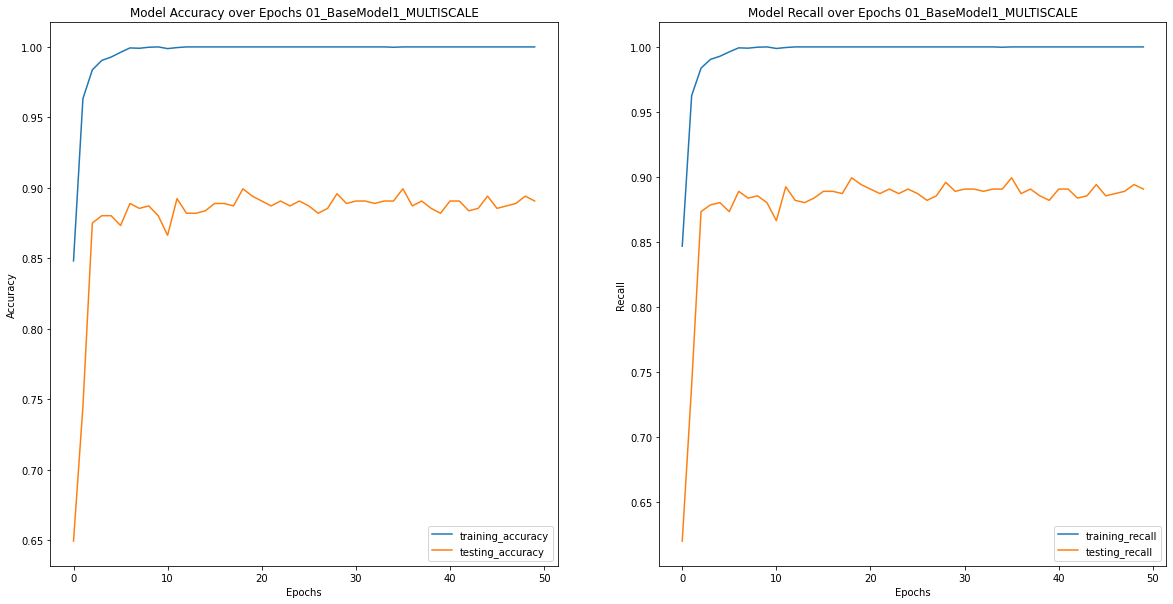

In [20]:
# Save results csv
saveResults_csv(df_results,"TrainedResults/01_BaseModel1_MULTISCALE/results/classificationReport/01_BaseModel1_MULTISCALE.csv")
# Save model training history
historyPath = "TrainedResults/01_BaseModel1_MULTISCALE/history/01_BaseModel1_MULTISCALE.npy"
save_history1(BaseModel1_MULTISCALE_history, historyPath)
# Load and plot model training history
history = load_history(historyPath)
plot_history(history, "01_BaseModel1_MULTISCALE", location = "TrainedResults/01_BaseModel1_MULTISCALE/history/01_BaseModel1_MULTISCALE.jpg")

### 01_BaseModel1_RAYLEIGH: Base Model 1 with Image Processing RAYLEIGH

#### Dataset Loading 

In [21]:
# Defining path of dataset
train_path = "/Dataset/Dataset_RAYLEIGH/train"
test_path = "/Dataset/Dataset_RAYLEIGH/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (100,100))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [22]:
# Create and Train Model
BaseModel1_RAYLEIGH = createBaseModel()
# Model summary
BaseModel1_RAYLEIGH.summary()
# Train model
checkpointPath = "TrainedResults/01_BaseModel1_RAYLEIGH/checkpoint/01_BaseModel1_RAYLEIGH.ckpt"
BaseModel1_RAYLEIGH_history = trainModel(BaseModel1_RAYLEIGH, train_data, valid_data, checkpointPath ,epochs = 50)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_21 (Conv2D)          (None, 100, 100, 8)       224       
                                                                 
 batch_normalization_21 (Bat  (None, 100, 100, 8)      32        
 chNormalization)                                                
                                                                 
 activation_21 (Activation)  (None, 100, 100, 8)       0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 99, 99, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 99, 99, 16)        1168

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 4s 6ms/step
Confusion Matrix:


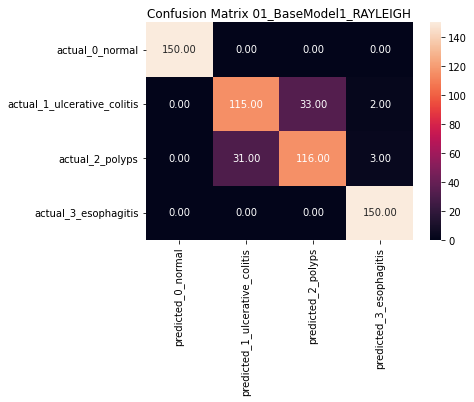

In [23]:
# Load best model from checkpoint folder
BaseModel1_RAYLEIGH = createBaseModel()
checkpointPath = "TrainedResults/01_BaseModel1_RAYLEIGH/checkpoint/01_BaseModel1_RAYLEIGH.ckpt"
loadModel(BaseModel1_RAYLEIGH,checkpointPath)
# Generate results for validation and save
df_results, confusion_matrix, y_true, predictions = testResults(BaseModel1_RAYLEIGH, test_data, "01_BaseModel1_RAYLEIGH" ,
                                                                data_class = ["0_normal_RAYLEIGH",
                                                                              "1_ulcerative_colitis_RAYLEIGH",
                                                                              "2_polyps_RAYLEIGH",
                                                                              "3_esophagitis_RAYLEIGH"],
                                                                location = "TrainedResults/01_BaseModel1_RAYLEIGH/results/confusionMatrix/01_BaseModel1_RAYLEIGH.jpg")

INFO:tensorflow:Assets written to: ram://8f3c3518-d7d3-432e-b3dd-fdb2f55cacb1/assets


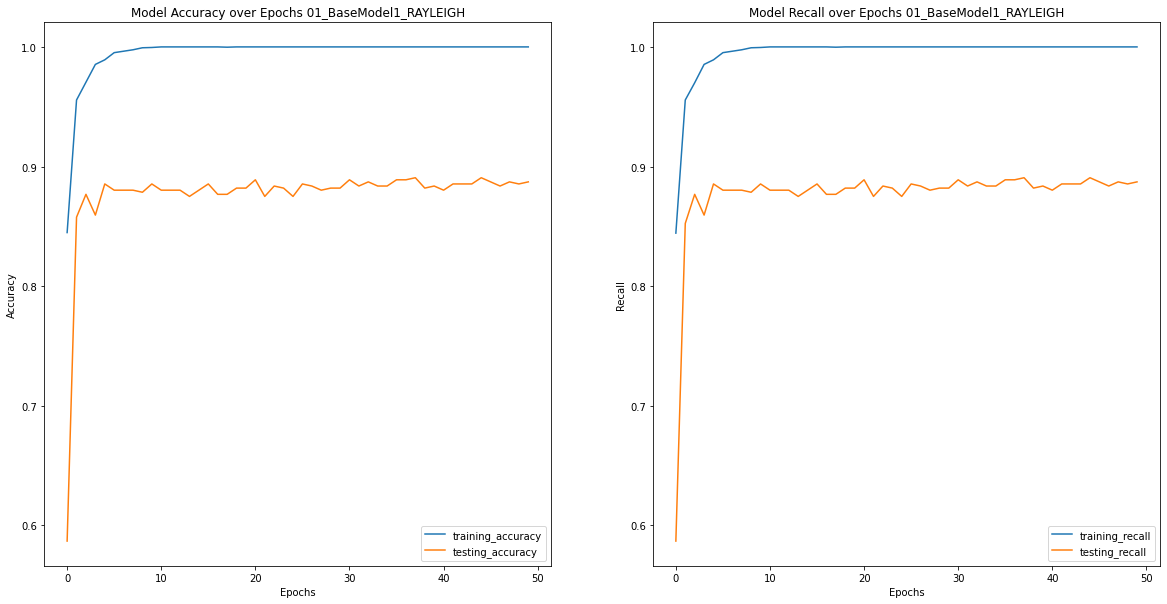

In [24]:
# Save results csv
saveResults_csv(df_results,"TrainedResults/01_BaseModel1_RAYLEIGH/results/classificationReport/01_BaseModel1_RAYLEIGH.csv")
# Save model training history
historyPath = "TrainedResults/01_BaseModel1_RAYLEIGH/history/01_BaseModel1_RAYLEIGH.npy"
save_history1(BaseModel1_RAYLEIGH_history, historyPath)
# load and plot model training history
history = load_history(historyPath)
plot_history(history, "01_BaseModel1_RAYLEIGH", location = "TrainedResults/01_BaseModel1_RAYLEIGH/history/01_BaseModel1_RAYLEIGH.jpg")

### 01_BaseModel1_CLAHE_tunedAdam: Base Model 1 with Image Processing CLAHE (Optimizer - Adam)

#### Dataset Loading 

In [25]:
# Defining path of dataset
train_path = "/Dataset/Dataset_CLAHE/train"
test_path = "/Dataset/Dataset_CLAHE/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (100,100))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [26]:
# Create and Train Model
BaseModel1_CLAHE_tunedAdam = createBaseModel(optimizer = tf.keras.optimizers.Adam())
# Model summary
BaseModel1_CLAHE_tunedAdam.summary()
# Train model
checkpointPath = "TrainedResults/01_BaseModel1_CLAHE_tunedAdam/checkpoint/01_BaseModel1_CLAHE_tunedAdam.ckpt"
BaseModel1_CLAHE_tunedAdam_history = trainModel(BaseModel1_CLAHE_tunedAdam, train_data, valid_data, checkpointPath ,epochs = 50)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_27 (Conv2D)          (None, 100, 100, 8)       224       
                                                                 
 batch_normalization_27 (Bat  (None, 100, 100, 8)      32        
 chNormalization)                                                
                                                                 
 activation_27 (Activation)  (None, 100, 100, 8)       0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 99, 99, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 99, 99, 16)        1168

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 4s 6ms/step
Confusion Matrix:


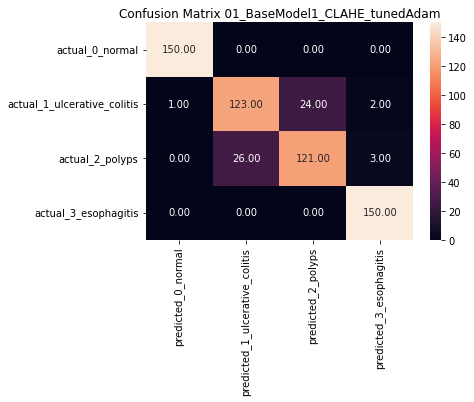

In [27]:
# Load best model from checkpoint folder
BaseModel1_CLAHE_tunedAdam = createBaseModel()
checkpointPath = "TrainedResults/01_BaseModel1_CLAHE_tunedAdam/checkpoint/01_BaseModel1_CLAHE_tunedAdam.ckpt"
loadModel(BaseModel1_CLAHE_tunedAdam,checkpointPath)
# Generate results for validation and save
df_results, confusion_matrix, y_true, predictions = testResults(BaseModel1_CLAHE_tunedAdam, test_data, "01_BaseModel1_CLAHE_tunedAdam" ,
                                                                data_class = ["0_normal_CLAHE",
                                                                              "1_ulcerative_colitis_CLAHE",
                                                                              "2_polyps_CLAHE",
                                                                              "3_esophagitis_CLAHE"],
                                                                location = "TrainedResults/01_BaseModel1_CLAHE_tunedAdam/results/confusionMatrix/01_BaseModel1_CLAHE_tunedAdam.jpg")

INFO:tensorflow:Assets written to: ram://782b023c-6443-41d9-9cde-512a3360750f/assets


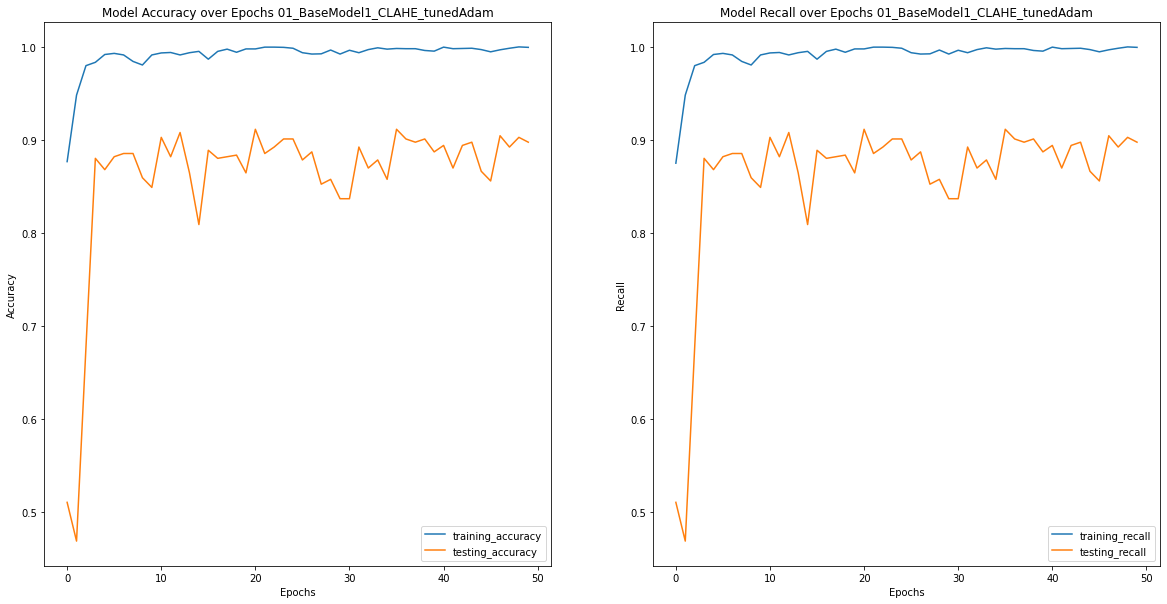

In [28]:
# Save results csv
saveResults_csv(df_results,"TrainedResults/01_BaseModel1_CLAHE_tunedAdam/results/classificationReport/01_BaseModel1_CLAHE_tunedAdam.csv")
# Save model training history
historyPath = "TrainedResults/01_BaseModel1_CLAHE_tunedAdam/history/01_BaseModel1_CLAHE_tunedAdam.npy"
save_history1(BaseModel1_CLAHE_tunedAdam_history, historyPath)
# Load and plot model training history
history = load_history(historyPath)
plot_history(history, "01_BaseModel1_CLAHE_tunedAdam", location = "TrainedResults/01_BaseModel1_CLAHE_tunedAdam/history/01_BaseModel1_CLAHE_tunedAdam.jpg")

### 01_BaseModel1_CLAHE_tunedLrScheduler: Base Model 1 with Image Processing CLAHE (Optimizer - LrScheduler)

#### Dataset Loading 

In [29]:
# Defining path of dataset
train_path = "/Dataset/Dataset_CLAHE/train"
test_path = "/Dataset/Dataset_CLAHE/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (100,100))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [30]:
# Create and Train Model
BaseModel1_CLAHE_tunedLrScheduler = createBaseModel()
# Model summary
BaseModel1_CLAHE_tunedLrScheduler.summary()
# Train model
checkpointPath = "TrainedResults/01_BaseModel1_CLAHE_tunedLrScheduler/checkpoint/01_BaseModel1_CLAHE_tunedLrScheduler.ckpt"
BaseModel1_CLAHE_tunedLrScheduler_history = trainModelLrScheduler(BaseModel1_CLAHE_tunedLrScheduler, train_data, valid_data, checkpointPath ,epochs = 50, epochCutOff = 25, reductionRatio = 2)

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_33 (Conv2D)          (None, 100, 100, 8)       224       
                                                                 
 batch_normalization_33 (Bat  (None, 100, 100, 8)      32        
 chNormalization)                                                
                                                                 
 activation_33 (Activation)  (None, 100, 100, 8)       0         
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 99, 99, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 99, 99, 16)        116

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 4s 7ms/step
Confusion Matrix:


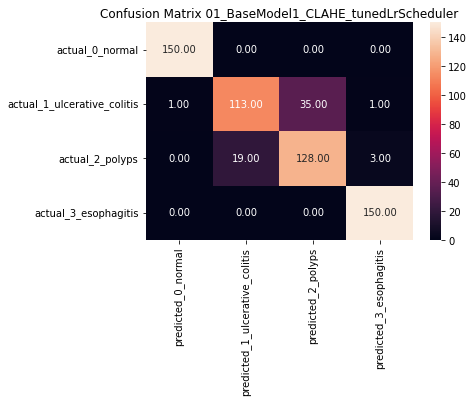

In [31]:
# Load best model from checkpoint folder
BaseModel1_CLAHE_tunedLrScheduler = createBaseModel()
checkpointPath = "TrainedResults/01_BaseModel1_CLAHE_tunedLrScheduler/checkpoint/01_BaseModel1_CLAHE_tunedLrScheduler.ckpt"
loadModel(BaseModel1_CLAHE_tunedLrScheduler,checkpointPath)
# Generate results for validation and save
df_results, confusion_matrix, y_true, predictions = testResults(BaseModel1_CLAHE_tunedLrScheduler, test_data, "01_BaseModel1_CLAHE_tunedLrScheduler" ,
                                                                data_class = ["0_normal_CLAHE",
                                                                              "1_ulcerative_colitis_CLAHE",
                                                                              "2_polyps_CLAHE",
                                                                              "3_esophagitis_CLAHE"],
                                                                location = "TrainedResults/01_BaseModel1_CLAHE_tunedLrScheduler/results/confusionMatrix/01_BaseModel1_CLAHE_tunedLrScheduler.jpg")

INFO:tensorflow:Assets written to: ram://4a118a58-60fa-4803-9063-ebf205967a0f/assets


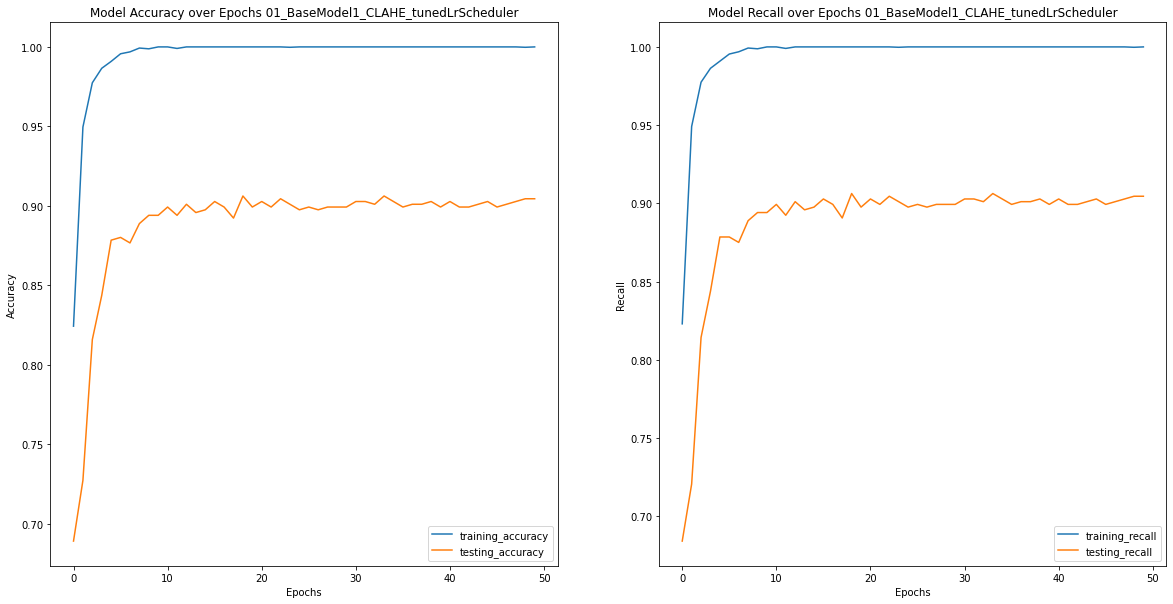

In [32]:
# Save results csv
saveResults_csv(df_results,"TrainedResults/01_BaseModel1_CLAHE_tunedLrScheduler/results/classificationReport/01_BaseModel1_CLAHE_tunedLrScheduler.csv")
# Save model training history
historyPath = "TrainedResults/01_BaseModel1_CLAHE_tunedLrScheduler/history/01_BaseModel1_CLAHE_tunedLrScheduler.npy"
save_history1(BaseModel1_CLAHE_tunedLrScheduler_history, historyPath)
# Load and plot model training history
history = load_history(historyPath)
plot_history(history, "01_BaseModel1_CLAHE_tunedLrScheduler", location = "TrainedResults/01_BaseModel1_CLAHE_tunedLrScheduler/history/01_BaseModel1_CLAHE_tunedLrScheduler.jpg")

### 01_BaseModel1_CLAHE_tunedAdamLrScheduler: Base Model 1 with Image Processing CLAHE (Optimizer - Adam + LrScheduler)

In [6]:
# Defining path of dataset
train_path = "/Dataset/Dataset_CLAHE/train"
test_path = "/Dataset/Dataset_CLAHE/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (100,100))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [7]:
# Create and Train Model
BaseModel1_CLAHE_tunedAdamLrScheduler = createBaseModel()
# Model summary
BaseModel1_CLAHE_tunedAdamLrScheduler.summary()
# Train model
checkpointPath = "TrainedResults/01_BaseModel1_CLAHE_tunedAdamLrScheduler/checkpoint/01_BaseModel1_CLAHE_tunedAdamLrScheduler.ckpt"
BaseModel1_CLAHE_tunedAdamLrScheduler_history = trainModelLrScheduler(BaseModel1_CLAHE_tunedAdamLrScheduler, train_data, valid_data, checkpointPath ,epochs = 50, epochCutOff = 75, reductionRatio = 2)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 100, 100, 8)       224       
                                                                 
 batch_normalization_6 (Batc  (None, 100, 100, 8)      32        
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 100, 100, 8)       0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 99, 8)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 99, 99, 16)        1168

2022-08-25 22:34:12.561697: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


131/131 [==============================] - ETA: 0s - loss: 6.1192 - accuracy: 0.8601 - recall: 0.8596
Epoch 00001: val_accuracy improved from -inf to 0.75694, saving model to TrainedResults/01_BaseModel1_CLAHE_tunedAdamLrScheduler/checkpoint/01_BaseModel1_CLAHE_tunedAdamLrScheduler.ckpt
131/131 [==============================] - 44s 315ms/step - loss: 6.1192 - accuracy: 0.8601 - recall: 0.8596 - val_loss: 1.2295 - val_accuracy: 0.7569 - val_recall: 0.7517 - lr: 0.0100

Epoch 00002: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 2/50
131/131 [==============================] - ETA: 0s - loss: 0.2184 - accuracy: 0.9587 - recall: 0.9587
Epoch 00002: val_accuracy improved from 0.75694 to 0.86979, saving model to TrainedResults/01_BaseModel1_CLAHE_tunedAdamLrScheduler/checkpoint/01_BaseModel1_CLAHE_tunedAdamLrScheduler.ckpt
131/131 [==============================] - 28s 211ms/step - loss: 0.2184 - accuracy: 0.9587 - recall: 0.9587 - val_loss: 0.6230 - val_accuracy

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 4s 6ms/step
Confusion Matrix:


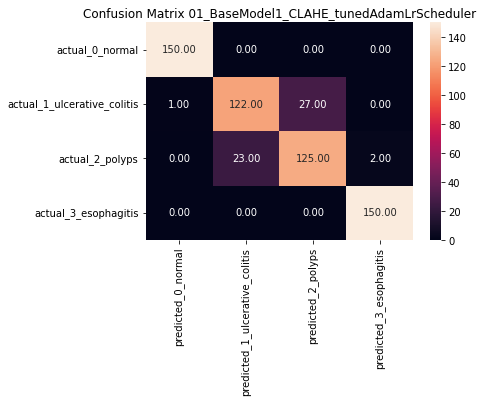

In [8]:
# Load best model from checkpoint folder
BaseModel1_CLAHE_tunedAdamLrScheduler = createBaseModel()
checkpointPath = "TrainedResults/01_BaseModel1_CLAHE_tunedAdamLrScheduler/checkpoint/01_BaseModel1_CLAHE_tunedAdamLrScheduler.ckpt"
loadModel(BaseModel1_CLAHE_tunedAdamLrScheduler,checkpointPath)
# Generate results for validation and save
df_results, confusion_matrix, y_true, predictions = testResults(BaseModel1_CLAHE_tunedAdamLrScheduler, test_data, "01_BaseModel1_CLAHE_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal_CLAHE",
                                                                              "1_ulcerative_colitis_CLAHE",
                                                                              "2_polyps_CLAHE",
                                                                              "3_esophagitis_CLAHE"],
                                                                location = "TrainedResults/01_BaseModel1_CLAHE_tunedAdamLrScheduler/results/confusionMatrix/01_BaseModel1_CLAHE_tunedAdamLrScheduler.jpg")

2022-08-25 22:56:28.424178: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://0a09b66b-6ba8-4830-ae07-dd116ecbe85b/assets


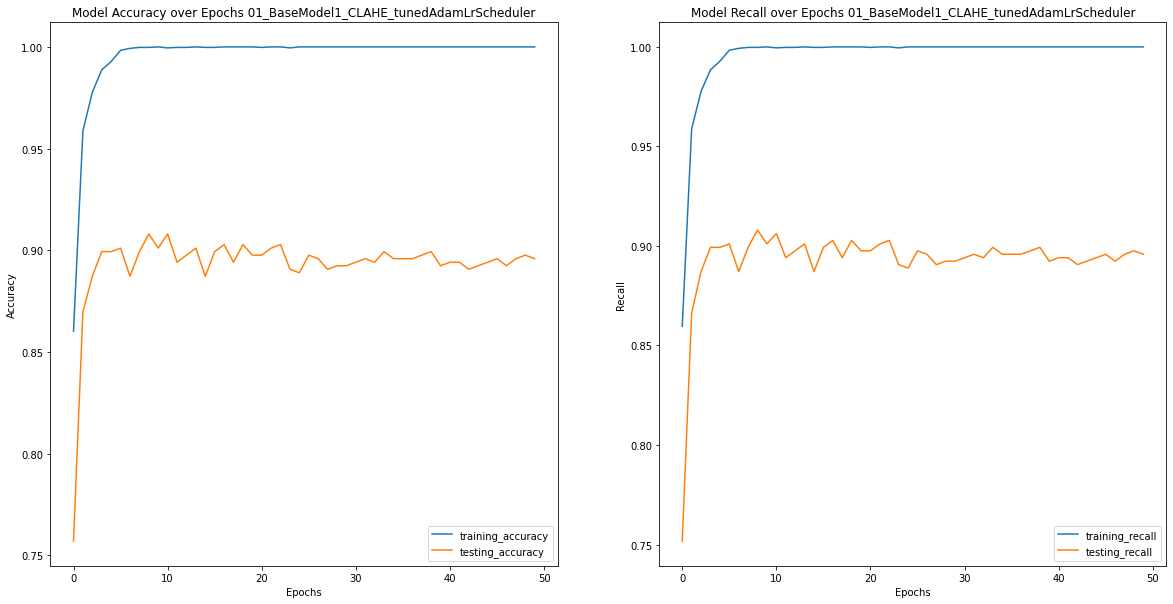

In [9]:
# Save results csv
saveResults_csv(df_results,"TrainedResults/01_BaseModel1_CLAHE_tunedAdamLrScheduler/results/classificationReport/01_BaseModel1_CLAHE_tunedAdamLrScheduler.csv")
historyPath = "TrainedResults/01_BaseModel1_CLAHE_tunedAdamLrScheduler/history/01_BaseModel1_CLAHE_tunedAdamLrScheduler.npy"
# Save model training history
save_history1(BaseModel1_CLAHE_tunedAdamLrScheduler_history, historyPath)
# Load and plot model training history
history = load_history(historyPath)
plot_history(history, "01_BaseModel1_CLAHE_tunedAdamLrScheduler", location = "TrainedResults/01_BaseModel1_CLAHE_tunedAdamLrScheduler/history/01_BaseModel1_CLAHE_tunedAdamLrScheduler.jpg")